In [1]:
# Latent Dirichlet Allocation is a probabilistic model
# to find clusters assignments for documents
# Uses 2 probability values to cluster documents:
# P(word|topic) and P(topics|documents)

# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

## 1. Topic Modeling using Newspaper Headlines Dataset

In [2]:
# Dataset: a million news headlines from the Austrian Broadcasting Corporation (on Kaggle)
# https://www.kaggle.com/datasets/therohk/million-headlines
headlines_df = pd.read_csv('./datasets/abcnews-date-text.csv')
headlines_df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [3]:
headlines_df.shape

(1244184, 2)

In [4]:
NUM_SAMPLES = 10000

headlines_df = headlines_df.sample(NUM_SAMPLES, random_state=1, replace=False).reset_index(drop=True)

In [5]:
X = headlines_df['headline_text']
X.head()

0             sunday november 11 full program
1             talks focus on harbour security
2    mental health campaign gains ama support
3     pampered pooches treated to doggy radio
4            giant potato salad breaks record
Name: headline_text, dtype: object

In [6]:
count_vectorizer = CountVectorizer(ngram_range=(2,2))
transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector.shape

(10000, 45179)

In [7]:
feature_names = count_vectorizer.get_feature_names()
len(feature_names)

/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


45179

In [9]:
feature_names[1000:1005]

['afghan request',
 'afghan sentenced',
 'afghan troops',
 'afghan violence',
 'afghan vote']

In [10]:
NUM_TOPICS = 20

lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=20)
lda = lda_model.fit_transform(transformed_vector) 

lda.shape # lda is a document-topic matrix

(10000, 20)

In [11]:
lda[:2]

array([[0.01, 0.01, 0.01, 0.81, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.81, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]])

In [12]:
sum(lda[0])

1.0000000000000007

In [13]:
lda_model.components_.shape # components_[i, j] is a pseudocount of the number times word j was assigned to topic i

(20, 45179)

In [18]:
def print_topic(identifier, top_words=10):
    for topic_id, topic_word_probs in enumerate(lda_model.components_):
        if topic_id==identifier:
            print('Topic %d:' % (topic_id))
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words -1 : -1]]
            print(' '.join(top_feature_names))           

In [22]:
# Let's have a look at the key word for the topics
for i in range(5):
    print_topic(i, top_words=3)   

Topic 0:
on the to be set to
Topic 1:
gold coast accused of of the
Topic 2:
calls for on the call for
Topic 3:
call for support for urged to
Topic 4:
abc weather jailed for covid 19


In [27]:
topics = []

for i in range(NUM_SAMPLES):
    topics.append(lda[i].argmax())
    
headlines_df['topic'] = topics
headlines_df.head()

,publish_date,headline_text,topic
0,20181111,sunday november 11 full program,3
1,20040428,talks focus on harbour security,8
2,20040813,mental health campaign gains ama support,2
3,20060827,pampered pooches treated to doggy radio,3
4,20031120,giant potato salad breaks record,16


### Using Manifold Learning technique to reduce dimensionality

In [29]:
# TSNE keeps similar instances lcose to each other and dissimilar instances apart
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)

In [30]:
lda_2d_tsne = tsne.fit_transform(lda)
lda.shape, lda_2d_tsne.shape

/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


((10000, 20), (10000, 2))

In [31]:
lda_2d_tsne = pd.DataFrame(lda_2d_tsne)
lda_2d_tsne.shape

(10000, 2)

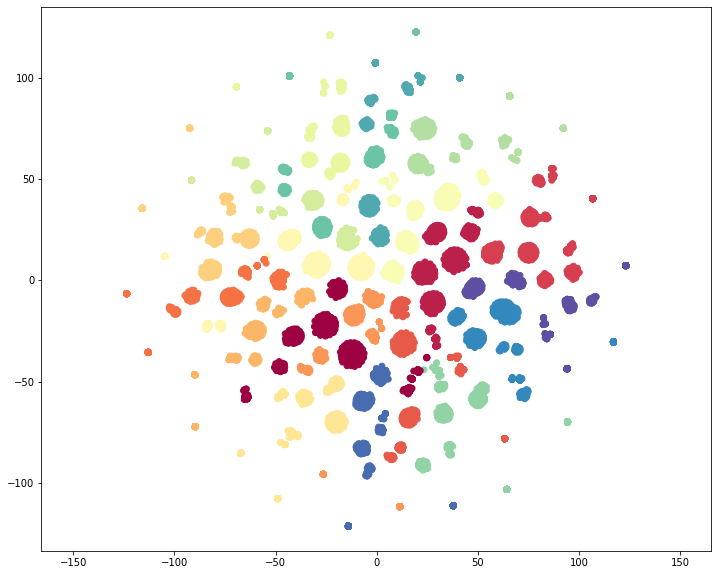

In [32]:
plt.subplots(figsize=(12, 10))
plt.axis('equal')

plt.scatter(lda_2d_tsne[0], lda_2d_tsne[1], c=headlines_df['topic'], cmap=plt.cm.Spectral)

## 2. Topic Modeling using DBPedia Dataset

In [47]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
# Dataset - large multi-domain ontology derived from Wikipedia, can be found at:
# https://www.kaggle.com/datasets/danofer/dbpedia-classes
# http://dbpedia-generic.tib.eu/release/text/
dbpedia_df = pd.read_csv('./datasets/dbpedia/DBPEDIA_train.csv')

dbpedia_df.shape

(240942, 4)

In [63]:
dbpedia_df.head()

,text,l1,l2,l3
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator
1,Lions is the sixth studio album by American ro...,Work,MusicalWork,Album
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",Place,NaturalPlace,Mountain
3,Cancer Prevention Research is a biweekly peer-...,Work,PeriodicalLiterature,AcademicJournal
4,The Princeton University Chapel is located on ...,Place,Building,HistoricBuilding


In [64]:
NUM_SAMPLES = 10000

dbpedia_df = dbpedia_df.sample(NUM_SAMPLES, random_state=1, replace=False).reset_index(drop=True)
dbpedia_df.sample(5)

,text,l1,l2,l3
878,"Danielle \""Dani\"" Sutherland is a fictional ch...",Agent,FictionalCharacter,SoapCharacter
2744,"Irvin v. Dowd, 359 U.S. 394 (1959), was a Unit...",UnitOfWork,LegalCase,SupremeCourtOfTheUnitedStatesCase
640,Lindsay Transit provides bus service to the co...,Agent,Company,BusCompany
9227,University Health Network (UHN) is a healthcar...,Place,Building,Hospital
1001,The Volta a Lleida was a road cycling stage ra...,Event,Race,CyclingRace


In [69]:
sorted(dbpedia_df['l1'].unique())

['Agent',
 'Device',
 'Event',
 'Place',
 'Species',
 'SportsSeason',
 'TopicalConcept',
 'UnitOfWork',
 'Work']

In [70]:
X = dbpedia_df['text']
X.head()

0    Mutter's Ridge was the name given by U.S. Mari...
1    Ligia exotica, also called sea roach or wharf ...
2    The AFC Asian Cup 2004 Final was an associatio...
3    Pasta Zara – Cogeas (UCI team code: PZC) is a ...
4    The 1969 Madrid Grand Prix was a Formula One n...
Name: text, dtype: object

In [71]:
count_vectorizer = CountVectorizer(max_df=1000, min_df=3)
transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector.shape

(10000, 17169)

In [76]:
feature_names = count_vectorizer.get_feature_names()
feature_names[9000:9005]

['kiev', 'kilda', 'kildare', 'kilkenny', 'kill']

In [77]:
NUM_TOPICS=7

lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=20)
lda = lda_model.fit_transform(transformed_vector) 
lda.shape # lda is a document-topic matrix

(10000, 7)

In [78]:
lda[:2]

array([[0.00199081, 0.00198964, 0.14845735, 0.66947099, 0.17410571,
        0.00199488, 0.00199062],
       [0.96262679, 0.00621526, 0.00622677, 0.0062686 , 0.00622033,
        0.00622295, 0.0062193 ]])

In [79]:
sum(lda[0])

0.9999999999999999

In [80]:
lda_model.components_.shape

(7, 17169)

In [89]:
def get_topic(identifier, top_words=10):
    for topic_id, topic_word_probs in enumerate(lda_model.components_):
        if topic_id==identifier:
            #print('Topic %d:' % (topic_id))
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words -1 : -1]]
            return(' '.join(top_feature_names))  
        
def print_topic(identifier, top_words=10):
    for topic_id, topic_word_probs in enumerate(lda_model.components_):
        if topic_id==identifier:
            print('Topic %d:' % (topic_id))
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words -1 : -1]]
            print(' '.join(top_feature_names))    

In [90]:
# Let's have a look at the key word for the topics
for i in range(7):
    print_topic(i, top_words=5)  

Topic 0:
species family station found genus
Topic 1:
party bridge published magazine bank
Topic 2:
album released music their song
Topic 3:
located river lake south north
Topic 4:
school university served states church
Topic 5:
league season football club cup
Topic 6:
she her race year championships


In [91]:
topic_id_topic_mapping = {}

for i in range(7):
    topic_id_topic_mapping[i]=get_topic(i, top_words=3)

topic_id_topic_mapping

{0: 'species family station',
 1: 'party bridge published',
 2: 'album released music',
 3: 'located river lake',
 4: 'school university served',
 5: 'league season football',
 6: 'she her race'}

In [93]:
topic_to_doc_mapping = {}
topic_list = []
topic_names = []

for i in range(NUM_SAMPLES):
    most_likely_topic=lda[i].argmax()
    
    if most_likely_topic not in topic_to_doc_mapping:
        topic_to_doc_mapping[most_likely_topic]=[]
        
    topic_to_doc_mapping[most_likely_topic].append(i)
    
    topic_list.append(most_likely_topic)
    topic_names.append(topic_id_topic_mapping[most_likely_topic])
    
dbpedia_df['Most_Likely_Topic']= topic_list
dbpedia_df['Most_Likely_Topic_Names']= topic_names

dbpedia_df.head()

,text,l1,l2,l3,Most_Likely_Topic,Most_Likely_Topic_Names
0,Mutter's Ridge was the name given by U.S. Mari...,Place,NaturalPlace,MountainRange,3,located river lake
1,"Ligia exotica, also called sea roach or wharf ...",Species,Animal,Crustacean,0,species family station
2,The AFC Asian Cup 2004 Final was an associatio...,Event,SportsEvent,FootballMatch,5,league season football
3,Pasta Zara – Cogeas (UCI team code: PZC) is a ...,Agent,SportsTeam,CyclingTeam,6,she her race
4,The 1969 Madrid Grand Prix was a Formula One n...,Event,SportsEvent,GrandPrix,0,species family station


In [95]:
print(topic_to_doc_mapping[0][:100]) # to know document IDs associated to a particular topic

[1, 4, 27, 36, 37, 42, 49, 50, 53, 66, 68, 70, 75, 82, 83, 97, 121, 145, 154, 161, 177, 180, 184, 198, 201, 206, 211, 213, 217, 219, 220, 221, 223, 225, 238, 239, 266, 267, 272, 275, 278, 285, 300, 314, 323, 344, 345, 348, 367, 378, 380, 395, 411, 417, 423, 431, 435, 443, 445, 456, 488, 492, 500, 503, 506, 523, 526, 528, 529, 531, 535, 538, 539, 540, 546, 547, 564, 565, 569, 575, 578, 591, 601, 602, 626, 650, 653, 659, 661, 664, 673, 698, 720, 723, 730, 733, 739, 743, 762, 767]


In [98]:
topic_of_interest = 0
doc_ids = topic_to_doc_mapping[topic_of_interest][:4]

for doc_index in doc_ids:
    print(X.iloc[doc_index])
    print('====')

Ligia exotica, also called sea roach or wharf roach is a woodlouse-like isopod, a sea slater in the family Ligiidae. It is found in various parts of the world living on rocky coasts and harbour walls just above high water mark.
====
The 1969 Madrid Grand Prix was a Formula One non-championship race held at Jarama, Madrid on 13 April 1969, run over 40 laps of the circuit. The field only included two Formula One cars however, the remainder being Formula 5000 and Formula Two cars. The entrants included Max Mosley, later to become president of the FIA, who drove a Formula Two Lotus. The fastest combination in the event was clearly Peter Gethin in his F5000 McLaren-Chevrolet, but after an engine failure on the last lap, it was left to Keith Holland to take the victory, with the rest of the field at least a lap down. Contemporary reports listed Tony Dean (BRM P261) as finishing second having completed 39 out of 40 laps. However, Gethin broke down on lap 40 and some later reports classify him

### Visualizing Topics using Manifold Learning

In [100]:
# Isomap algorithm creates a map by connecting each instance to its neignbors
# and then reduces dimensiionality while trying to preserve geodesic distances
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=20, n_components=2)
lda_d2_isomap = isomap.fit_transform(lda)

In [101]:
lda_df_isomap = pd.DataFrame(lda_d2_isomap)
lda_df_isomap.head()

,0,1
0,-0.452485,-0.104697
1,-0.137255,-0.077570
2,0.532651,-0.056983
3,0.302877,0.631332
4,0.205912,0.123964


In [102]:
lda_df_isomap.shape

(10000, 2)

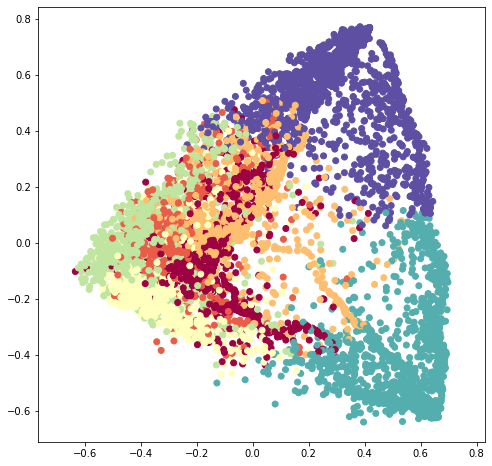

In [107]:
plt.subplots(figsize=(8, 8))
plt.axis('equal')

plt.scatter(lda_df_isomap[0], lda_df_isomap[1], c=dbpedia_df['Most_Likely_Topic'], cmap=plt.cm.Spectral)

In [108]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)

lda_2d_tsne = tsne.fit_transform(lda)
lda.shape, lda_2d_tsne.shape

/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


((10000, 7), (10000, 2))

In [109]:
lda_2d_tsne = pd.DataFrame(lda_2d_tsne)
lda_2d_tsne.shape

(10000, 2)

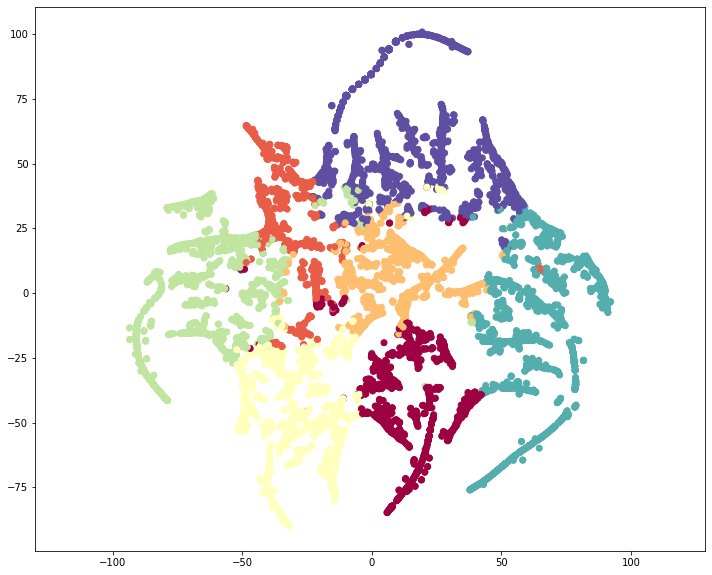

In [112]:
plt.subplots(figsize=(12, 10))
plt.axis('equal')

plt.scatter(lda_2d_tsne[0], lda_2d_tsne[1], c=dbpedia_df['Most_Likely_Topic'], cmap=plt.cm.Spectral)

### Using PyLDAvis

In [113]:
# pyLDAvis - Python library for interactive topic model visualization
#!/Users/isavchuk/projects/text_mining/venv/bin/python3 -m pip install -q pyldavis

In [114]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [115]:
panel = pyLDAvis.sklearn.prepare(lda_model, transformed_vector, count_vectorizer, mds='tsne')
panel

/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
 

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5     -29.594002  60.112713       1        1  17.409182
4     -45.996586  11.891685       2        1  16.109836
2      20.368856  70.019325       3        1  14.815419
6      53.928768  31.704309       4        1  14.293660
3     -12.437127 -26.423267       5        1  13.650349
1       3.965971  21.797720       6        1  12.030188
0      37.524284 -16.517805       7        1  11.691365, topic_info=           Term         Freq        Total Category  logprob  loglift
14118       she  1585.000000  1585.000000  Default  30.0000  30.0000
9285     league  1688.000000  1688.000000  Default  29.0000  29.0000
6778   football  1582.000000  1582.000000  Default  28.0000  28.0000
13894    season  1717.000000  1717.000000  Default  27.0000  27.0000
14622   species  1017.000000  1017.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
10730      name   208.480095   741.977003   Topic7  -5.7762   0.8768
14503      some   176.529148   462.838467   Topic7  -5.9426   1.1824
11036       not   214.629310   986.903818   Topic7  -5.7471   0.6207
15551     their   226.948989  1464.139986   Topic7  -5.6913   0.2820
11017     north   192.483982  1018.101926   Topic7  -5.8560   0.4806

[510 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
1          1  0.054588    000
1          2  0.013278    000
1          3  0.079669    000
1          4  0.140158    000
1          5  0.504570    000
...      ...       ...    ...
17066      6  0.174970  years
17066      7  0.057672  years
17082      3  0.946644    you
17082      4  0.034423    you
17082      5  0.017212    you

[1228 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 3, 7, 4, 2, 1])

/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/isavchuk/projects/text_mining/venv/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/isavchuk/